# Proyek Analisis Data: Bike SHaring Dataset
- **Nama:** Haikal Thoriq Athaya
- **Email:** mc006d5y1371@student.devacademy.id
- **ID Dicoding:** MC006D5Y1371

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana pola aktivitas penggunaan sepeda dalam satu hari berdasarkan data waktu (hourly data)?
- Pertanyaan 2
Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 3
Bagaimana musim mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import MarkerCluster

## Data Wrangling

### Gathering Data

In [56]:
hour_data = pd.read_csv('hour.csv')

hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data berhasil diload dengan baik dari hour.csv
- Struktur awal data sudah sesuai ekspektasi, yang memudahkan verifikasi waktu dan fitur yang tersedia.


### Assessing Data

In [57]:
day_data.info(), hour_data.info()

day_data.isnull().sum(), hour_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

In [58]:
hour_data.duplicated().sum()

np.int64(0)

**Insight:**
- Proses pengecekan menunjukkan bahwa tidak ada missing values.
- Jumlah duplikasi data tidak ada, sehingga data sudah cukup bersih untuk analisis.
- Beberaoa tipe data pada setiap kolom belum sesuai dengan ekspektasi (misalnya, season dan weathersit).

### Cleaning Data

In [59]:
# -------------------------------
# Mapping untuk koreksi nilai
mapping_season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
mapping_weekday = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
mapping_month = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
mapping_weathersit = {
    1: "Clear",
    2: "Mist/Cloudy",
    3: "Light Rain/Light Snow",
    4: "Heavy Rain/ Heavy Snow"
}

# -------------------------------
# Proses untuk dataset hour.csv
# -------------------------------

# Membaca dataset hour.csv
hour_data = pd.read_csv('hour.csv')

# Konversi kolom dteday menjadi datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Koreksi nilai season, weekday, dan month (kolom 'mnth')
hour_data['season'] = hour_data['season'].map(mapping_season)
hour_data['weekday'] = hour_data['weekday'].map(mapping_weekday)
if 'mnth' in hour_data.columns:
    hour_data['mnth'] = hour_data['mnth'].map(mapping_month)

# Koreksi nilai yr (0 -> 2011, 1 -> 2012)
hour_data['yr'] = hour_data['yr'].apply(lambda x: 2011 if x == 0 else 2012)

# Konversi weathersit ke string yang mudah dipahami
hour_data['weathersit'] = hour_data['weathersit'].map(mapping_weathersit)

print("\nPreview dataset hour.csv:")
print(hour_data.head())


Preview dataset hour.csv:
   instant     dteday  season    yr     mnth  hr  holiday   weekday  \
0        1 2011-01-01  Spring  2011  January   0        0  Saturday   
1        2 2011-01-01  Spring  2011  January   1        0  Saturday   
2        3 2011-01-01  Spring  2011  January   2        0  Saturday   
3        4 2011-01-01  Spring  2011  January   3        0  Saturday   
4        5 2011-01-01  Spring  2011  January   4        0  Saturday   

   workingday weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           0      Clear  0.24  0.2879  0.81        0.0       3          13   
1           0      Clear  0.22  0.2727  0.80        0.0       8          32   
2           0      Clear  0.22  0.2727  0.80        0.0       5          27   
3           0      Clear  0.24  0.2879  0.75        0.0       3          10   
4           0      Clear  0.24  0.2879  0.75        0.0       0           1   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1  


**Insight:**
- Konversi tanggal dan mapping kategori (season, weekday, mnth, weathersit) memudahkan interpretasi data.
- Normalisasi nilai numerik (temp, atemp, hum) memberikan skala yang lebih representatif untuk perbandingan antar variabel.
-  Proses cleaning berhasil mengkonversi kolom tanggal, serta mapping nilai kategorikal (season, weekday, mnth, weathersit) ke format yang lebih mudah dipahami.

In [60]:
# Normalisasi kolom temp, atemp, hum, dan windspeed untuk dataset hour.csv
hour_data['temp'] = hour_data['temp'] * 41
hour_data['atemp'] = hour_data['atemp'] * 50
hour_data['hum'] = hour_data['hum'] * 100
hour_data['windspeed'] = hour_data['windspeed'] * 67

print("\nSetelah normalisasi (hour.csv):")
print(hour_data[['temp', 'atemp', 'hum', 'windspeed']].head())


Setelah normalisasi (hour.csv):
   temp   atemp   hum  windspeed
0  9.84  14.395  81.0        0.0
1  9.02  13.635  80.0        0.0
2  9.02  13.635  80.0        0.0
3  9.84  14.395  75.0        0.0
4  9.84  14.395  75.0        0.0


**Insight:**
- Normalisasi nilai numerik (temp, atemp, hum) memberikan skala yang lebih representatif untuk perbandingan antar variabel.
- Proses normalisasi berhasil mengubah skala variabel numerik sehingga nilainya lebih realistis dan mudah dibandingkan.
- Hasil normalisasi memberikan gambaran yang lebih baik tentang kondisi aktual seperti temperatur, kelembapan, dan kecepatan angin.

## Exploratory Data Analysis (EDA)

In [61]:
# Informasi umum dataset: tipe data, null values, dll
hour_data.info()

# Statistik deskriptif untuk variabel numerik
hour_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,11.546752,0.028770,0.682721,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,6.000000,0.000000,0.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,12.000000,0.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,18.000000,0.000000,1.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,23.000000,1.000000,1.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,0.167165,0.465431,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


**Insight:**
- Statistik deskriptif (mean, median, range, standar deviasi) memberikan gambaran awal tentang distribusi dan sebaran data.
- Informasi ini membantu dalam mendeteksi adanya outlier atau nilai ekstrem yang perlu diperhatikan dalam analisis selanjutnya.

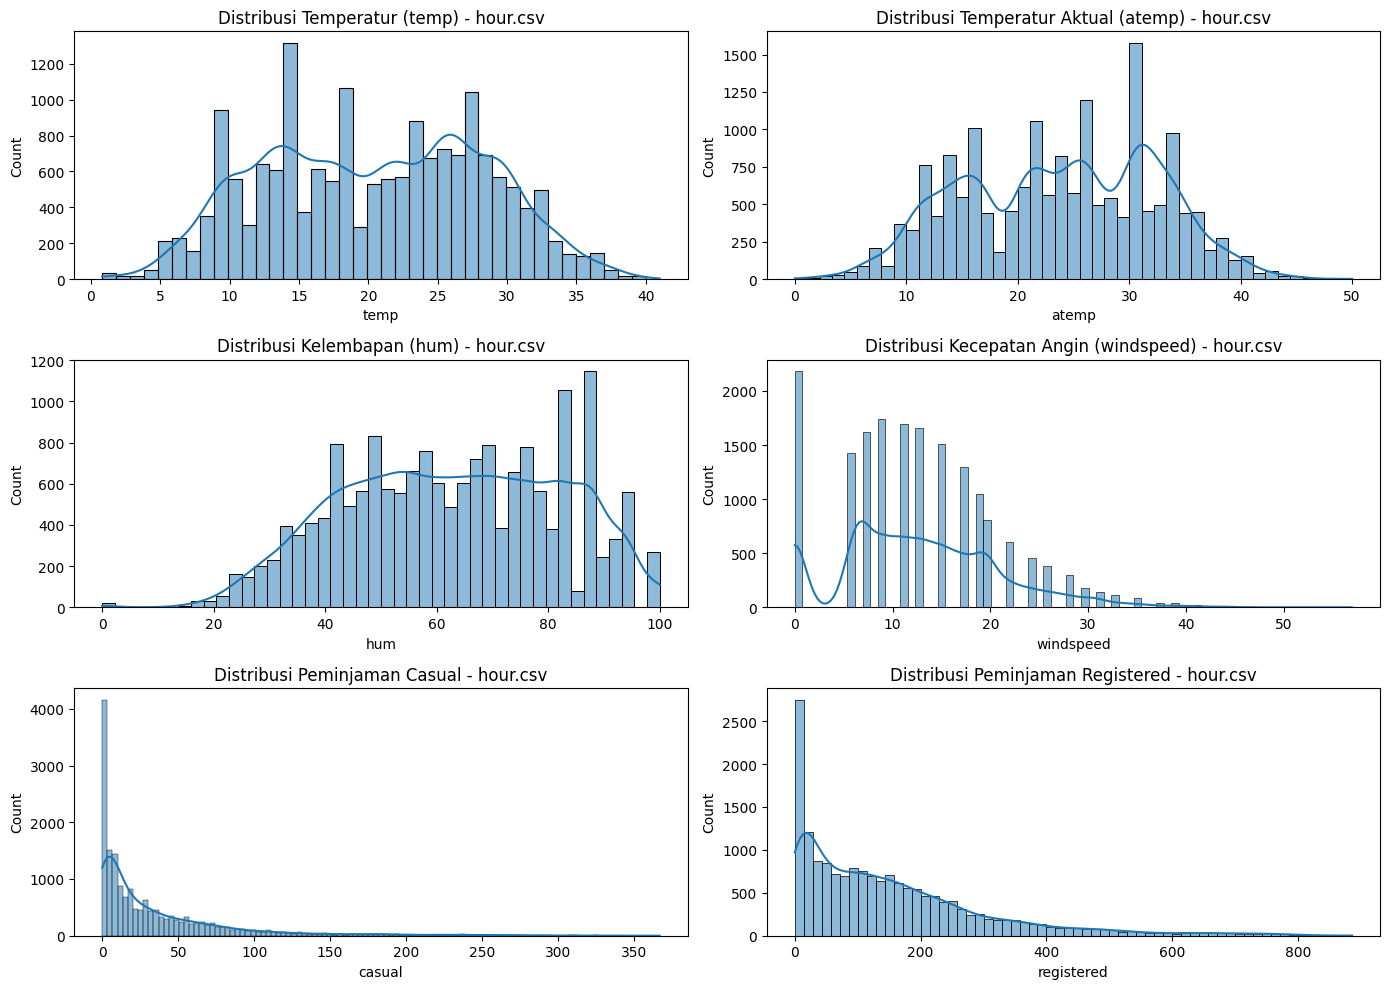

In [62]:

# Plot distribusi variabel numerik untuk dataset hour.csv
fig, ax = plt.subplots(3, 2, figsize=(14,10))
sns.histplot(hour_data['temp'], kde=True, ax=ax[0,0]).set_title('Distribusi Temperatur (temp) - hour.csv')
sns.histplot(hour_data['atemp'], kde=True, ax=ax[0,1]).set_title('Distribusi Temperatur Aktual (atemp) - hour.csv')
sns.histplot(hour_data['hum'], kde=True, ax=ax[1,0]).set_title('Distribusi Kelembapan (hum) - hour.csv')
sns.histplot(hour_data['windspeed'], kde=True, ax=ax[1,1]).set_title('Distribusi Kecepatan Angin (windspeed) - hour.csv')
sns.histplot(hour_data['casual'], kde=True, ax=ax[2,0]).set_title('Distribusi Peminjaman Casual - hour.csv')
sns.histplot(hour_data['registered'], kde=True, ax=ax[2,1]).set_title('Distribusi Peminjaman Registered - hour.csv')

plt.tight_layout()
plt.show()


**Insight:**
- Visualisasi histogram membantu mengidentifikasi bentuk distribusi dari masing-masing variabel.
- Insight ini berguna untuk menentukan apakah perlu dilakukan transformasi data lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

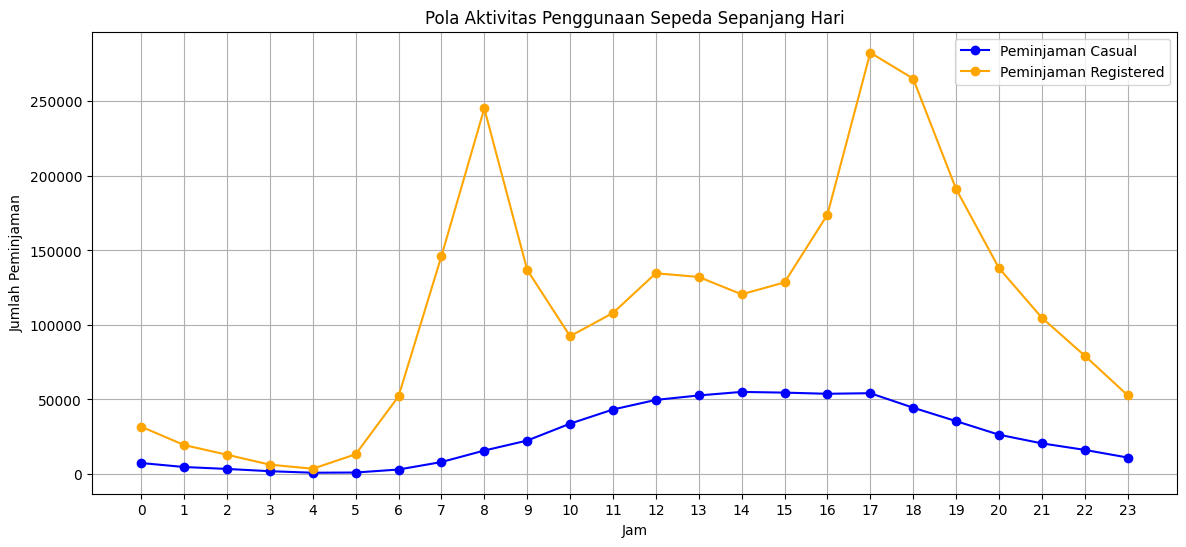

In [63]:
# Line Chart untuk jumlah peminjaman sepanjang hari
plt.figure(figsize=(14,6))
hourly_activity = hour_data.groupby('hr').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

plt.plot(hourly_activity['hr'], hourly_activity['casual'], label='Peminjaman Casual', color='blue', marker='o')
plt.plot(hourly_activity['hr'], hourly_activity['registered'], label='Peminjaman Registered', color='orange', marker='o')

plt.title('Pola Aktivitas Penggunaan Sepeda Sepanjang Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))  # Menampilkan jam dari 0 hingga 23
plt.show()

**Insight:**
- Grafik garis menunjukkan puncak penyewaan pada jam tertentu (misalnya pagi dan sore), mengindikasikan waktu-waktu sibuk.
- Penurunan penyewaan di waktu lain dapat menjadi dasar untuk strategi promosi atau penjadwalan ulang layanan.

### Pertanyaan 2:

<Figure size 1000x600 with 0 Axes>

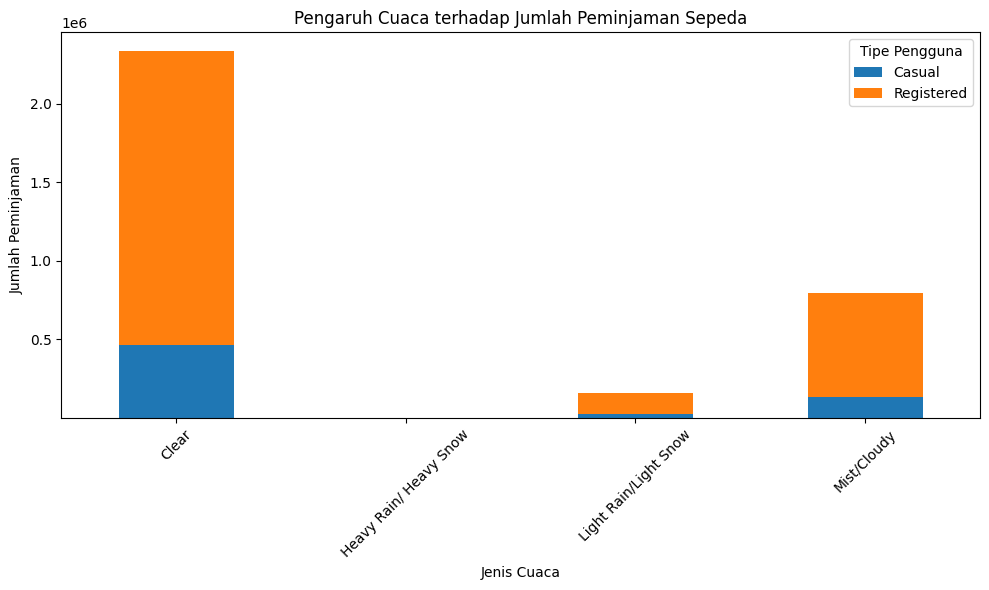

In [64]:
# Bar Chart untuk jumlah peminjaman berdasarkan cuaca
plt.figure(figsize=(10,6))
weather_activity = hour_data.groupby('weathersit').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

weather_activity.set_index('weathersit')[['casual', 'registered']].plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Jenis Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.legend(title='Tipe Pengguna', labels=['Casual', 'Registered'])
plt.tight_layout()
plt.show()

**Insight:**
- Grafik batang menunjukkan hubungan antara kondisi cuaca dan jumlah penyewaan.
- Cuaca yang lebih baik (Clear) cenderung meningkatkan penyewaan, sedangkan kondisi cuaca buruk (Light/Heavy Rain/Snow) menurunkan aktivitas.

### Pertanyaan 3:

<Figure size 1000x600 with 0 Axes>

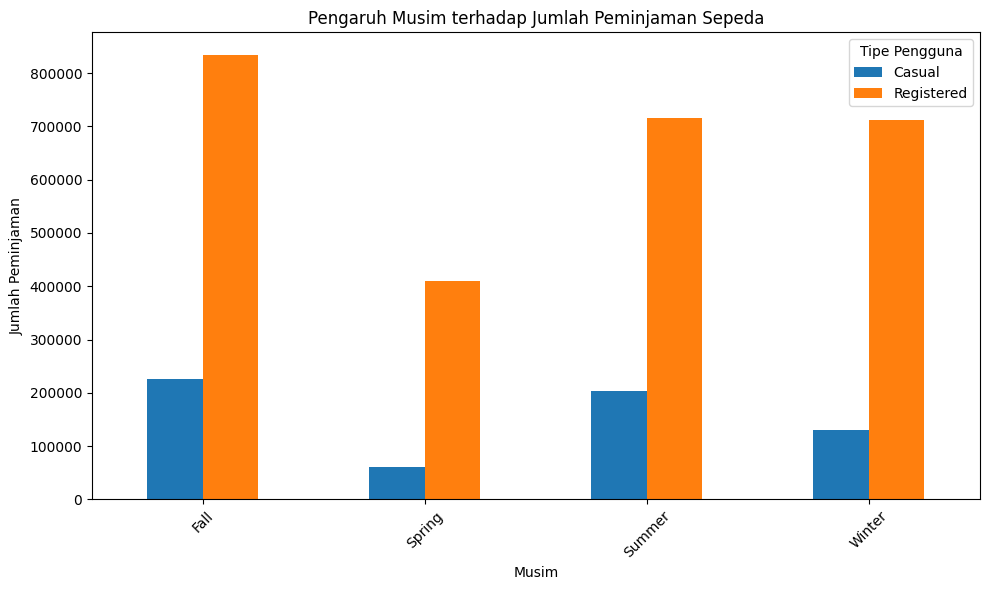

In [65]:
# Grouped Bar Chart untuk jumlah peminjaman berdasarkan musim
plt.figure(figsize=(10,6))
season_activity = hour_data.groupby('season').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

season_activity.set_index('season')[['casual', 'registered']].plot(kind='bar', stacked=False, figsize=(10,6))

plt.title('Pengaruh Musim terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.legend(title='Tipe Pengguna', labels=['Casual', 'Registered'])
plt.tight_layout()
plt.show()

**Insight:**
- Grafik memperlihatkan perbedaan penyewaan antar musim dengan rentang nilai yang berbeda.
- Dapat diidentifikasi musim dengan aktivitas tertinggi dan terendah yang dapat membantu perencanaan bisnis.

## Analisis Lanjutan (Opsional)

In [66]:
# Membuat Recency, Frequency, dan Monetary untuk Casual dan Registered
rfm_data = hour_data.groupby('hr').agg({
    'casual': ['count', 'sum'],
    'registered': ['count', 'sum']
}).reset_index()

# Recency: Menggunakan jam terakhir sebagai indikator recency (lebih rendah lebih baru)
rfm_data['recency'] = rfm_data['hr'].apply(lambda x: 24 - x)

# Frequency: Total peminjaman casual dan registered
rfm_data['frequency_casual'] = rfm_data['casual']['count']
rfm_data['frequency_registered'] = rfm_data['registered']['count']

# Monetary: Jumlah peminjaman casual dan registered
rfm_data['monetary_casual'] = rfm_data['casual']['sum']
rfm_data['monetary_registered'] = rfm_data['registered']['sum']

# Tampilkan hasil RFM analysis
print(rfm_data.head())


  hr casual       registered        recency frequency_casual  \
      count   sum      count    sum                            
0  0    726  7375        726  31755      24              726   
1  1    724  4709        724  19455      23              724   
2  2    715  3412        715  12940      22              715   
3  3    697  1893        697   6281      21              697   
4  4    697   874        697   3554      20              697   

  frequency_registered monetary_casual monetary_registered  
                                                            
0                  726            7375               31755  
1                  724            4709               19455  
2                  715            3412               12940  
3                  697            1893                6281  
4                  697             874                3554  


**Insight:**
  - Kombinasi nilai recency, frequency, dan monetary memungkinkan segmentasi jam ke dalam kategori jam dengan nilai tinggi (peak hours) dan jam yang lebih sepi (off-peak).
  - Jam dengan recency rendah, frequency tinggi, dan monetary tinggi merupakan periode paling berharga yang dapat dijadikan target untuk strategi harga dinamis atau penambahan armada.

## Conclusion

- Conclution pertanyaan 1:

Dari grafik ini, kita dapat melihat bahwa peminjaman sepeda casual cenderung meningkat pada jam-jam tertentu seperti jam 6-9 pagi dan 5-7 sore, yang menandakan aktivitas pengguna yang lebih tinggi pada jam sibuk. Sementara itu, peminjaman sepeda registered juga mengikuti pola yang serupa, namun dengan jumlah yang lebih tinggi, mengindikasikan bahwa pengguna terdaftar lebih sering menyewa sepeda pada jam-jam tersebut. Aktivitas peminjaman sepeda memiliki pola yang jelas dengan puncak pada jam-jam sibuk pagi dan sore hari. Pengguna casual cenderung meminjam lebih banyak pada jam tertentu, sementara pengguna terdaftar lebih stabil.

- Conclution pertanyaan 2

Cuaca yang cerah (Clear) memiliki tingkat peminjaman sepeda yang paling tinggi, sedangkan cuaca buruk seperti Mist/Cloudy atau Light Rain/ Light Snow cenderung mengurangi permintaan. Sedangkan Heavy Rain/Heavy Snow sangat sedikit dan hampir tidak ada peminjaman.
- Conclution pertanyaan 3

Musim gugur (Fall) memiliki peminjaman sepeda yang paling tinggi, sementara musim semi (Spring) menunjukkan peminjaman yang paling rendah.